# Stacking In Practice

## Kaggle Kernel
- [Default EDA - Stacking Introduction](https://www.kaggle.com/yeonmin/default-eda-stacking-introduction)

## Article
- [Stacking Made Easy: An Introduction to StackNet by Competitions Grandmaster Marios Michailidis \(KazAnova\)](http://blog.kaggle.com/2017/06/15/stacking-made-easy-an-introduction-to-stacknet-by-competitions-grandmaster-marios-michailidis-kazanova/)

## Inspiration

> - 2 or 3 GBMs (one with low depth, one with medium and one with high)
>
> - 1 or 2 Random Forests (again as diverse as possible–one low depth, one high)
>
> - 1 or 2 NNs (one deeper, one smaller)
>
> - 1 linear model


![stacking_in_practice_1](stacking_in_practice_1.png)

![stacking_in_practice_2](stacking_in_practice_2.png)

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

ipython = get_ipython()

def exception_handler(exception_type, exception, traceback):
    print("%s: %s" % (exception_type.__name__, exception), file=sys.stderr)

ipython._showtraceback = exception_handler

from utils import *

Using TensorFlow backend.


In [3]:
# Set a few plotting defaults
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [4]:
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000
pd.options.display.max_colwidth = 1000

In [5]:
data_list = []

X_train_1km, X_test_1km, y_train = load_data(nb_1km=True, nb_3km=False, nb_5km=False,
                                             n_5_nb=False, n_10_nb=False, n_20_nb=False,
                                             original=False, do_scale=False, do_ohe=True)
data_list.append((X_train_1km, X_test_1km))

X_train_3km, X_test_3km, y_train = load_data(nb_1km=False, nb_3km=True, nb_5km=False,
                                             n_5_nb=False, n_10_nb=False, n_20_nb=False,
                                             original=False, do_scale=False, do_ohe=True)
data_list.append((X_train_3km, X_test_3km))

X_train_5km, X_test_5km, y_train = load_data(nb_1km=False, nb_3km=False, nb_5km=True,
                                             n_5_nb=False, n_10_nb=False, n_20_nb=False,
                                             original=False, do_scale=False, do_ohe=True)
data_list.append((X_train_5km, X_test_5km))

X_train_5_nn, X_test_5_nn, y_train = load_data(nb_1km=False, nb_3km=False, nb_5km=False,
                                               n_5_nb=True, n_10_nb=False, n_20_nb=False,
                                               original=False, do_scale=False, do_ohe=True)
data_list.append((X_train_5_nn, X_test_5_nn))

X_train_10_nn, X_test_10_nn, y_train = load_data(nb_1km=False, nb_3km=False, nb_5km=False,
                                                 n_5_nb=False, n_10_nb=True, n_20_nb=False,
                                                 original=False, do_scale=False, do_ohe=True)
data_list.append((X_train_10_nn, X_test_10_nn))

X_train_20_nn, X_test_20_nn, y_train = load_data(nb_1km=False, nb_3km=False, nb_5km=False,
                                                 n_5_nb=False, n_10_nb=False, n_20_nb=True,
                                                 original=False, do_scale=False, do_ohe=True)
data_list.append((X_train_20_nn, X_test_20_nn))

X_train_ori, X_test_ori, y_train = load_data(nb_1km=False, nb_3km=False, nb_5km=False,
                                             n_5_nb=False, n_10_nb=False, n_20_nb=False,
                                             original=True, do_scale=False, do_ohe=True)
data_list.append((X_train_ori, X_test_ori))

X_train_full, X_test_full, y_train = load_data(nb_1km=True, nb_3km=True, nb_5km=True,
                                               n_5_nb=True, n_10_nb=True, n_20_nb=True,
                                               original=True, do_scale=False, do_ohe=True)
data_list.append((X_train_full, X_test_full))

(15034, 50) (6468, 50) (15034,)
(15034, 50) (6468, 50) (15034,)
(15034, 50) (6468, 50) (15034,)
(15034, 50) (6468, 50) (15034,)
(15034, 50) (6468, 50) (15034,)
(15034, 50) (6468, 50) (15034,)
(15034, 392) (6468, 392) (15034,)
(15034, 734) (6468, 734) (15034,)


In [10]:
model_list = []

lgb_param = {
    'objective': 'regression',
    'learning_rate': 0.01,
    'max_depth': 20,
    'num_leaves': 63,
    'min_data_in_leaf': 30,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'feature_fraction': 0.2,
    'seed': RANDOM_SEED,
    'metric': ['rmse'],
}
lgb_model = LgbmWrapper(params=lgb_param, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list.append(lgb_model)

lgb_param2 = {
    'objective': 'regression',
    'learning_rate': 0.01,
    'max_depth': 10,
    'num_leaves': 31,
    'min_data_in_leaf': 30,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'feature_fraction': 0.2,
    'seed': RANDOM_SEED,
    'metric': ['rmse'],
}
lgb_model2 = LgbmWrapper(params=lgb_param2, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list.append(lgb_model2)

lgb_param3 = {
    'objective': 'regression',
    'learning_rate': 0.01,
    'max_depth': 3,
    'num_leaves': 7,
    'min_data_in_leaf': 30,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'feature_fraction': 0.2,
    'seed': RANDOM_SEED,
    'metric': ['rmse'],
}
lgb_model3 = LgbmWrapper(params=lgb_param3, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list.append(lgb_model3)

xgb_param = {
    'eval_metric': 'rmse',
    'seed': RANDOM_SEED,
    'eta': 0.01,
    'max_depth': 20,
    'subsample': 0.7,
    'colsample_bytree': 0.5,
    'silent': 1,
}
xgb_model = XgbWrapper(params=xgb_param, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list.append(xgb_model)

xgb_param2 = {
    'eval_metric': 'rmse',
    'seed': RANDOM_SEED,
    'eta': 0.01,
    'max_depth': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.5,
    'silent': 1,
}
xgb_model2 = XgbWrapper(params=xgb_param2, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list.append(xgb_model2)

xgb_param3 = {
    'eval_metric': 'rmse',
    'seed': RANDOM_SEED,
    'eta': 0.01,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.5,
    'silent': 1,
}
xgb_model3 = XgbWrapper(params=xgb_param3, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list.append(xgb_model3)

rf_param = {
    'n_estimators': 1000,
    'max_depth': 20,
    'max_features': 0.6,
    'n_jobs': -1,
    'random_state': RANDOM_SEED
}
rf_model = SklearnWrapper(RandomForestRegressor, params=rf_param)
model_list.append(rf_model)

rf_param2 = {
    'n_estimators': 1000,
    'max_depth': 3,
    'max_features': 0.6,
    'n_jobs': -1,
    'random_state': RANDOM_SEED
}
rf_model2 = SklearnWrapper(RandomForestRegressor, params=rf_param2)
model_list.append(rf_model2)

ridge_param = {'alpha': 1e-3, 'normalize': True, 'max_iter': 1e7, 'random_state': RANDOM_SEED}
ridge_model = SklearnWrapper(Ridge, params=ridge_param)
model_list.append(ridge_model)

X_train_single, X_test_single, cv_score_single = stacking(data_list, y_train, model_list, eval_func=rmse_exp)


StartTime:  2019-04-21 13:00:04.237307
(15034, 50) (6468, 50) (15034,)

StartTime:  2019-04-21 13:00:04.237941
{'objective': 'regression', 'learning_rate': 0.01, 'max_depth': 20, 'num_leaves': 63, 'min_data_in_leaf': 30, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.2, 'seed': 0, 'metric': ['rmse']}

StartTime:  2019-04-21 13:00:04.243172
EndTime:  2019-04-21 13:00:38.407384
TotalTime:  34.16426920890808
Fold 1 /  CV-Score: 283921.861936

StartTime:  2019-04-21 13:00:38.442435
EndTime:  2019-04-21 13:01:06.589659
TotalTime:  28.147242784500122
Fold 2 /  CV-Score: 214036.750948

StartTime:  2019-04-21 13:01:06.620805
EndTime:  2019-04-21 13:01:33.909226
TotalTime:  27.28843402862549
Fold 3 /  CV-Score: 269409.407828

StartTime:  2019-04-21 13:01:33.939871
EndTime:  2019-04-21 13:02:03.708857
TotalTime:  29.76901340484619
Fold 4 /  CV-Score: 226571.316368

StartTime:  2019-04-21 13:02:03.740000
EndTime:  2019-04-21 13:02:38.535174
TotalTime:  34.79520130157471
Fold 5

EndTime:  2019-04-21 13:16:02.799508
TotalTime:  4.182909727096558
EndTime:  2019-04-21 13:16:03.126521
TotalTime:  23.29110622406006

StartTime:  2019-04-21 13:16:03.126671
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=0.6, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

StartTime:  2019-04-21 13:16:03.132565
EndTime:  2019-04-21 13:16:04.103823
TotalTime:  0.9713037014007568
Fold 1 /  CV-Score: 301204.382739

StartTime:  2019-04-21 13:16:04.437400
EndTime:  2019-04-21 13:16:05.410419
TotalTime:  0.973050594329834
Fold 2 /  CV-Score: 224454.779753

StartTime:  2019-04-21 13:16:05.739669
EndTime:  2019-04-21 13:16:06.708222
TotalTime:  0.9685866832733154
Fold 3 /  CV-Score: 291357.356564

StartTime:  2019-04-21 

EndTime:  2019-04-21 13:36:57.691510
TotalTime:  23.87482476234436
Fold 4 /  CV-Score: 216942.739609

StartTime:  2019-04-21 13:36:57.714265
EndTime:  2019-04-21 13:37:26.887929
TotalTime:  29.173826456069946
Fold 5 /  CV-Score: 266834.459488
Average CV-Score:  249185.63155053635

StartTime:  2019-04-21 13:37:27.012038
EndTime:  2019-04-21 13:37:56.362152
TotalTime:  29.350565195083618
EndTime:  2019-04-21 13:37:56.416908
TotalTime:  186.84847831726074

StartTime:  2019-04-21 13:37:56.417428
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=0.6, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

StartTime:  2019-04-21 13:37:56.422817
EndTime:  2019-04-21 13:37:59.899996
TotalTime:  3.4770028591156006
Fold 1 /  CV-Scor

EndTime:  2019-04-21 13:54:53.166796
TotalTime:  36.457924365997314
Fold 1 /  CV-Score: 271795.864207

StartTime:  2019-04-21 13:54:53.205690
EndTime:  2019-04-21 13:55:25.634177
TotalTime:  32.42863082885742
Fold 2 /  CV-Score: 199512.601885

StartTime:  2019-04-21 13:55:25.669963
EndTime:  2019-04-21 13:56:00.068244
TotalTime:  34.398433446884155
Fold 3 /  CV-Score: 257698.445931

StartTime:  2019-04-21 13:56:00.104895
EndTime:  2019-04-21 13:56:25.595056
TotalTime:  25.490324020385742
Fold 4 /  CV-Score: 214600.907400

StartTime:  2019-04-21 13:56:25.624483
EndTime:  2019-04-21 13:57:00.192662
TotalTime:  34.56833529472351
Fold 5 /  CV-Score: 263404.892372
Average CV-Score:  241402.54235876072

StartTime:  2019-04-21 13:57:00.290541
EndTime:  2019-04-21 13:57:32.547110
TotalTime:  32.25701713562012
EndTime:  2019-04-21 13:57:32.603086
TotalTime:  195.89964294433594

StartTime:  2019-04-21 13:57:32.603656

StartTime:  2019-04-21 13:57:32.609022
EndTime:  2019-04-21 13:58:08.167290
To

EndTime:  2019-04-21 14:07:56.439250
TotalTime:  9.542929410934448
Fold 4 /  CV-Score: 159218.032832

StartTime:  2019-04-21 14:07:56.471871
EndTime:  2019-04-21 14:08:04.328729
TotalTime:  7.856889247894287
Fold 5 /  CV-Score: 191170.293610
Average CV-Score:  176635.4506755796

StartTime:  2019-04-21 14:08:04.410333
EndTime:  2019-04-21 14:08:30.160264
TotalTime:  25.749994039535522
EndTime:  2019-04-21 14:08:30.293579
TotalTime:  71.10593152046204

StartTime:  2019-04-21 14:08:30.294206

StartTime:  2019-04-21 14:08:30.299548
EndTime:  2019-04-21 14:09:25.167821
TotalTime:  54.86842393875122
Fold 1 /  CV-Score: 194329.335763

StartTime:  2019-04-21 14:09:25.211127
EndTime:  2019-04-21 14:10:09.793840
TotalTime:  44.58287000656128
Fold 2 /  CV-Score: 149419.407276

StartTime:  2019-04-21 14:10:09.828930
EndTime:  2019-04-21 14:11:02.762474
TotalTime:  52.93370580673218
Fold 3 /  CV-Score: 181063.458343

StartTime:  2019-04-21 14:11:02.804245
EndTime:  2019-04-21 14:11:47.655379
TotalT

EndTime:  2019-04-21 14:20:20.640347
TotalTime:  14.71125340461731
Fold 1 /  CV-Score: 186790.182680

StartTime:  2019-04-21 14:20:20.668497
EndTime:  2019-04-21 14:20:37.610831
TotalTime:  16.942342519760132
Fold 2 /  CV-Score: 152903.542855

StartTime:  2019-04-21 14:20:37.640745
EndTime:  2019-04-21 14:20:55.087628
TotalTime:  17.4468936920166
Fold 3 /  CV-Score: 181883.868848

StartTime:  2019-04-21 14:20:55.117767
EndTime:  2019-04-21 14:21:12.491139
TotalTime:  17.373383045196533
Fold 4 /  CV-Score: 154467.934850

StartTime:  2019-04-21 14:21:12.521458
EndTime:  2019-04-21 14:21:29.611079
TotalTime:  17.089632034301758
Fold 5 /  CV-Score: 190027.645685
Average CV-Score:  173214.63498364965

StartTime:  2019-04-21 14:21:29.718506
EndTime:  2019-04-21 14:22:09.298032
TotalTime:  39.579548597335815
EndTime:  2019-04-21 14:22:09.383765
TotalTime:  123.46020007133484

StartTime:  2019-04-21 14:22:09.383940

StartTime:  2019-04-21 14:22:09.389413
EndTime:  2019-04-21 14:22:17.995828
To

EndTime:  2019-04-21 14:32:23.086936
TotalTime:  0.010562419891357422
EndTime:  2019-04-21 14:32:23.089399
TotalTime:  0.20499587059020996
(15034, 50) (6468, 50) (15034,)

StartTime:  2019-04-21 14:32:23.089548

StartTime:  2019-04-21 14:32:23.094532
EndTime:  2019-04-21 14:32:49.569203
TotalTime:  26.474710941314697
Fold 1 /  CV-Score: 194294.193767

StartTime:  2019-04-21 14:32:49.598156
EndTime:  2019-04-21 14:33:19.524899
TotalTime:  29.9267578125
Fold 2 /  CV-Score: 145516.098473

StartTime:  2019-04-21 14:33:19.556722
EndTime:  2019-04-21 14:33:44.976338
TotalTime:  25.419636964797974
Fold 3 /  CV-Score: 183416.125131

StartTime:  2019-04-21 14:33:45.005009
EndTime:  2019-04-21 14:34:13.142701
TotalTime:  28.1377112865448
Fold 4 /  CV-Score: 152947.752222

StartTime:  2019-04-21 14:34:13.173732
EndTime:  2019-04-21 14:34:48.235234
TotalTime:  35.06152677536011
Fold 5 /  CV-Score: 185009.854597
Average CV-Score:  172236.8048380517

StartTime:  2019-04-21 14:34:48.352104
EndTime:  

Fold 2 /  CV-Score: 158900.329693

StartTime:  2019-04-21 14:49:33.061719
EndTime:  2019-04-21 14:49:34.043829
TotalTime:  0.9821913242340088
Fold 3 /  CV-Score: 221108.226527

StartTime:  2019-04-21 14:49:34.376538
EndTime:  2019-04-21 14:49:35.474303
TotalTime:  1.097808837890625
Fold 4 /  CV-Score: 183722.121783

StartTime:  2019-04-21 14:49:35.807145
EndTime:  2019-04-21 14:49:36.780265
TotalTime:  0.9731652736663818
Fold 5 /  CV-Score: 216034.018393
Average CV-Score:  200939.8330129792

StartTime:  2019-04-21 14:49:37.187525
EndTime:  2019-04-21 14:49:38.259881
TotalTime:  1.0723979473114014
EndTime:  2019-04-21 14:49:38.587222
TotalTime:  8.137371063232422

StartTime:  2019-04-21 14:49:38.587349
Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000000.0,
   normalize=True, random_state=0, solver='auto', tol=0.001)

StartTime:  2019-04-21 14:49:38.592491
EndTime:  2019-04-21 14:49:38.601227
TotalTime:  0.00873255729675293
Fold 1 /  CV-Score: 194712.234745

StartTime: 

EndTime:  2019-04-21 15:14:20.630996
TotalTime:  4.451281309127808
Fold 1 /  CV-Score: 143382.651162

StartTime:  2019-04-21 15:14:21.013600
EndTime:  2019-04-21 15:14:25.478241
TotalTime:  4.464693069458008
Fold 2 /  CV-Score: 110636.912209

StartTime:  2019-04-21 15:14:25.859910
EndTime:  2019-04-21 15:14:30.203951
TotalTime:  4.346746921539307
Fold 3 /  CV-Score: 129817.775792

StartTime:  2019-04-21 15:14:30.588860
EndTime:  2019-04-21 15:14:34.930466
TotalTime:  4.341634273529053
Fold 4 /  CV-Score: 121973.763504

StartTime:  2019-04-21 15:14:35.312855
EndTime:  2019-04-21 15:14:39.655001
TotalTime:  4.342170238494873
Fold 5 /  CV-Score: 138993.810323
Average CV-Score:  128960.98259811409

StartTime:  2019-04-21 15:14:40.187027
EndTime:  2019-04-21 15:14:45.693805
TotalTime:  5.506840229034424
EndTime:  2019-04-21 15:14:46.103763
TotalTime:  29.944056749343872

StartTime:  2019-04-21 15:14:46.103892
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max

EndTime:  2019-04-21 15:43:22.120292
TotalTime:  95.10993456840515
EndTime:  2019-04-21 15:43:22.419387
TotalTime:  441.60128235816956

StartTime:  2019-04-21 15:43:22.419809

StartTime:  2019-04-21 15:43:22.448726
EndTime:  2019-04-21 15:44:13.887488
TotalTime:  51.439165115356445
Fold 1 /  CV-Score: 125699.453508

StartTime:  2019-04-21 15:44:14.045480
EndTime:  2019-04-21 15:44:59.626643
TotalTime:  45.581188440322876
Fold 2 /  CV-Score: 97993.826267

StartTime:  2019-04-21 15:44:59.781186
EndTime:  2019-04-21 15:45:41.275562
TotalTime:  41.49478459358215
Fold 3 /  CV-Score: 106874.995538

StartTime:  2019-04-21 15:45:41.427495
EndTime:  2019-04-21 15:46:17.932290
TotalTime:  36.505200147628784
Fold 4 /  CV-Score: 104840.029478

StartTime:  2019-04-21 15:46:18.097180
EndTime:  2019-04-21 15:47:09.045811
TotalTime:  50.94903326034546
Fold 5 /  CV-Score: 126413.724563
Average CV-Score:  112364.4058708678

StartTime:  2019-04-21 15:47:09.279548
EndTime:  2019-04-21 15:48:21.066224
Tota

In [13]:
feature_set_list = ['nb_1km','nb_3km','nb_5km','nn_5','nn_10','nn_20','original','full']
model_name_list = ['lgb_high','lgb_mid','lgb_low','xgb_high','xgb_mid','xgb_low','rf_high','rf_low','ridge']
result = []
for feature_set in feature_set_list:
    for model_name in model_name_list:
        result.append(feature_set + ', ' + model_name)

cv_score_single_df = pd.DataFrame({
    'name': result,
    'Single Model CV Score':cv_score_single
})

cv_score_single_df

,name,Single Model CV Score
0,"nb_1km, lgb_high",252302.444815
1,"nb_1km, lgb_mid",251137.707417
2,"nb_1km, lgb_low",251033.446678
3,"nb_1km, xgb_high",248371.787402
4,"nb_1km, xgb_mid",247277.010869
5,"nb_1km, xgb_low",248590.482972
6,"nb_1km, rf_high",244981.870939
7,"nb_1km, rf_low",267574.509043
8,"nb_1km, ridge",307278.731724
9,"nb_3km, lgb_high",242585.296252


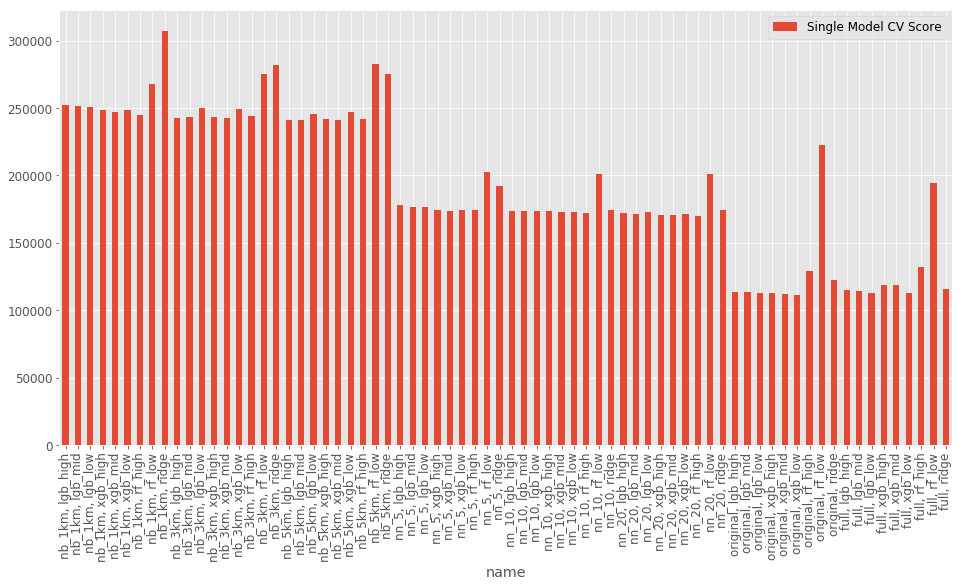

In [53]:
cv_score_single_df.set_index('name').plot.bar(figsize=(16,8));

In [14]:
X_train_single.shape, X_test_single.shape

((15034, 72), (6468, 72))

In [15]:
X_train_single.to_csv('../input/x_train_single.csv', index=False)
X_test_single.to_csv('../input/x_test_single.csv', index=False)
cv_score_single_df.to_csv('../input/cv_score_single.csv', index=False)

In [16]:
X_train_stage1 = pd.concat([
    pd.read_csv('../input/x_train_single.csv'),
    X_train_full[['nb_1km_price_mean','nb_3km_price_mean','nb_5km_price_mean',
                  'n_5_nb_price_mean','n_10_nb_price_mean','n_20_nb_price_mean']]
], axis=1)

X_test_stage1 = pd.concat([
    pd.read_csv('../input/x_test_single.csv'),
    X_test_full[['nb_1km_price_mean','nb_3km_price_mean','nb_5km_price_mean',
                 'n_5_nb_price_mean','n_10_nb_price_mean','n_20_nb_price_mean']].reset_index(drop=True)
], axis=1)

X_train_stage1.shape, X_test_stage1.shape

((15034, 78), (6468, 78))

In [17]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='selu', input_dim=input_dim,
                    kernel_initializer=initializers.he_normal(seed=RANDOM_SEED),
                    bias_initializer=initializers.Constant(0.01)))
    model.add(Dense(32, activation='selu', 
                    kernel_initializer=initializers.he_normal(seed=RANDOM_SEED),
                    bias_initializer=initializers.Constant(0.01)))
    model.add(Dense(16, activation='selu',
                    kernel_initializer=initializers.he_normal(seed=RANDOM_SEED),
                    bias_initializer=initializers.Constant(0.01)))
    model.add(Dense(8, activation='selu',
                    kernel_initializer=initializers.he_normal(seed=RANDOM_SEED),
                    bias_initializer=initializers.Constant(0.01)))
    model.add(Dense(1,
                    kernel_initializer=initializers.he_normal(seed=RANDOM_SEED),
                    bias_initializer=initializers.Constant(0.01)))


    optimizer = optimizers.RMSprop(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    
    return model

patient = 200

callbacks = [
    EarlyStopping(monitor='val_loss', patience=patient, mode='min', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=patient/2, min_lr=0.00001, verbose=1, mode='min')
]

In [18]:
model_list_second = []

keras_model = KerasWrapper(create_model, epochs=100000, batch_size=512, callbacks=callbacks, use_avg_oof=True)
model_list_second.append(keras_model)

et_param = {
    'n_estimators': 1000,
    'max_depth': 20,
    'max_features': 0.6,
    'n_jobs': -1,
    'random_state': RANDOM_SEED
}
et_model = SklearnWrapper(ExtraTreesRegressor, params=et_param)
model_list_second.append(et_model)

et_param2 = {
    'n_estimators': 1000,
    'max_depth': 3,
    'max_features': 0.6,
    'n_jobs': -1,
    'random_state': RANDOM_SEED
}
et_model2 = SklearnWrapper(ExtraTreesRegressor, params=et_param2)
model_list_second.append(et_model2)

lgb_param = {
    'objective': 'regression',
    'learning_rate': 0.01,
    'max_depth': 20,
    'num_leaves': 63,
    'min_data_in_leaf': 30,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'feature_fraction': 0.2,
    'seed': RANDOM_SEED,
    'metric': ['rmse'],
}
lgb_model = LgbmWrapper(params=lgb_param, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list_second.append(lgb_model)

lgb_param2 = {
    'objective': 'regression',
    'learning_rate': 0.01,
    'max_depth': 10,
    'num_leaves': 31,
    'min_data_in_leaf': 30,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'feature_fraction': 0.2,
    'seed': RANDOM_SEED,
    'metric': ['rmse'],
}
lgb_model2 = LgbmWrapper(params=lgb_param2, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list_second.append(lgb_model2)

lgb_param3 = {
    'objective': 'regression',
    'learning_rate': 0.01,
    'max_depth': 3,
    'num_leaves': 7,
    'min_data_in_leaf': 30,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'feature_fraction': 0.2,
    'seed': RANDOM_SEED,
    'metric': ['rmse'],
}
lgb_model3 = LgbmWrapper(params=lgb_param3, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list_second.append(lgb_model3)

xgb_param = {
    'eval_metric': 'rmse',
    'seed': RANDOM_SEED,
    'eta': 0.01,
    'max_depth': 20,
    'subsample': 0.7,
    'colsample_bytree': 0.5,
    'silent': 1,
}
xgb_model = XgbWrapper(params=xgb_param, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list_second.append(xgb_model)

xgb_param2 = {
    'eval_metric': 'rmse',
    'seed': RANDOM_SEED,
    'eta': 0.01,
    'max_depth': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.5,
    'silent': 1,
}
xgb_model2 = XgbWrapper(params=xgb_param2, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list_second.append(xgb_model2)

xgb_param3 = {
    'eval_metric': 'rmse',
    'seed': RANDOM_SEED,
    'eta': 0.01,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.5,
    'silent': 1,
}
xgb_model3 = XgbWrapper(params=xgb_param3, num_rounds=100000, ealry_stopping=200, verbose_eval=False)
model_list_second.append(xgb_model3)

rf_param = {
    'n_estimators': 1000,
    'max_depth': 20,
    'max_features': 0.6,
    'n_jobs': -1,
    'random_state': RANDOM_SEED
}
rf_model = SklearnWrapper(RandomForestRegressor, params=rf_param)
model_list_second.append(rf_model)

rf_param2 = {
    'n_estimators': 1000,
    'max_depth': 3,
    'max_features': 0.6,
    'n_jobs': -1,
    'random_state': RANDOM_SEED
}
rf_model2 = SklearnWrapper(RandomForestRegressor, params=rf_param2)
model_list_second.append(rf_model2)

ridge_param = {'alpha': 1e-10, 'normalize': True, 'max_iter': 1e7, 'random_state': RANDOM_SEED}
ridge_model = SklearnWrapper(Ridge, params=ridge_param)
model_list_second.append(ridge_model)

gbr_param = {
    'n_estimators': 1000,
    'learning_rate':0.1,
    'max_depth': 20,
    'subsample': 0.7,
    'max_features': 0.6,
    'random_state': RANDOM_SEED
}
gbr_model = SklearnWrapper(GradientBoostingRegressor, params=gbr_param)
model_list_second.append(gbr_model)

gbr_param2 = {
    'n_estimators': 1000,
    'learning_rate':0.1,
    'max_depth': 10,
    'subsample': 0.7,
    'max_features': 0.6,
    'random_state': RANDOM_SEED
}
gbr_model2 = SklearnWrapper(GradientBoostingRegressor, params=gbr_param2)
model_list_second.append(gbr_model2)

gbr_param3 = {
    'n_estimators': 1000,
    'learning_rate':0.1,
    'max_depth': 2,
    'subsample': 0.7,
    'max_features': 0.6,
    'random_state': RANDOM_SEED
}
gbr_model3 = SklearnWrapper(GradientBoostingRegressor, params=gbr_param3)
model_list_second.append(gbr_model3)

lasso_param = {'alpha':1e-6, 'normalize':True, 'max_iter':1e7, 'random_state':RANDOM_SEED}
lasso_model = SklearnWrapper(Lasso, params=lasso_param)
model_list_second.append(lasso_model)

elastic_param = {'alpha':1e-6, 'normalize':True, 'max_iter':1e5, 'random_state':RANDOM_SEED, 'l1_ratio':0.8}
elastic_model = SklearnWrapper(ElasticNet, params=elastic_param)
model_list_second.append(elastic_model)

svr_param = {'C':1e3, 'epsilon':0.001, 'gamma':1e-4}
svr_model = SklearnWrapper(SVR, params=svr_param)
model_list_second.append(svr_model)

In [19]:
data_list_stage1 = [(X_train_stage1, X_test_stage1)]
X_train_stage2, X_test_stage2, cv_score_stage1 = stacking(data_list_stage1, y_train, model_list_second,
                                                          eval_func=rmse_exp)


StartTime:  2019-04-21 16:32:51.661467
(15034, 78) (6468, 78) (15034,)

StartTime:  2019-04-21 16:32:51.661897
None

StartTime:  2019-04-21 16:32:51.675357
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

Epoch 00244: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00538: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 01042: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 01787: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 02074: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 02204: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 02304: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 03436: early stopping
EndTime:  2019-04-21 16:36:39.602111
TotalTime:  227.92691445350647
Fold 1 /  CV-Score: 124896.086370

StartTime:  2019-04-21 16:36:39.693687

E

EndTime:  2019-04-21 17:05:04.541425
TotalTime:  5.21098780632019
Fold 1 /  CV-Score: 136491.225090

StartTime:  2019-04-21 17:05:04.565881
EndTime:  2019-04-21 17:05:08.286882
TotalTime:  3.7210190296173096
Fold 2 /  CV-Score: 97786.119069

StartTime:  2019-04-21 17:05:08.308159
EndTime:  2019-04-21 17:05:12.188857
TotalTime:  3.8807101249694824
Fold 3 /  CV-Score: 131878.402477

StartTime:  2019-04-21 17:05:12.210301
EndTime:  2019-04-21 17:05:15.745140
TotalTime:  3.534858226776123
Fold 4 /  CV-Score: 107270.989104

StartTime:  2019-04-21 17:05:15.766037
EndTime:  2019-04-21 17:05:19.723618
TotalTime:  3.9575953483581543
Fold 5 /  CV-Score: 131039.997659
Average CV-Score:  120893.34667980373

StartTime:  2019-04-21 17:05:19.832401
EndTime:  2019-04-21 17:05:24.023993
TotalTime:  4.191603899002075
EndTime:  2019-04-21 17:05:24.049542
TotalTime:  24.725199222564697

StartTime:  2019-04-21 17:05:24.049701
{'objective': 'regression', 'learning_rate': 0.01, 'max_depth': 3, 'num_leaves': 

EndTime:  2019-04-21 17:11:26.726158
TotalTime:  0.015781164169311523
EndTime:  2019-04-21 17:11:26.727730
TotalTime:  0.20803356170654297

StartTime:  2019-04-21 17:11:26.727821
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=20, max_features=0.6,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=0.7, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

StartTime:  2019-04-21 17:11:26.732440
EndTime:  2019-04-21 17:14:04.903486
TotalTime:  158.17108035087585
Fold 1 /  CV-Score: 116300.990609

StartTime:  2019-04-21 17:14:04.992563
EndTime:  2019-04-21 17:16:44.671272
TotalTime:  159.67874908447266
Fold 2 /  CV-Score: 106911.749076

StartTime:

In [20]:
stage1_model_name_list = ['nn','ext_high','ext_low','lgb_high','lgb_mid','lgb_low','xgb_high','xgb_mid','xgb_low',
                   'rf_high','rf_low','ridge','gbr_high','gbr_mid','gbr_low','lasso','elastic','svr']

cv_score_stage1_df = pd.DataFrame({
    'name': stage1_model_name_list,
    'Stage 1 CV Score':cv_score_stage1
})

cv_score_stage1_df

,name,Stage 1 CV Score
0,nn,107752.221529
1,ext_high,106784.360249
2,ext_low,151230.437697
3,lgb_high,121755.029946
4,lgb_mid,120893.346680
5,lgb_low,120632.330307
6,xgb_high,108891.101682
7,xgb_mid,109384.565167
8,xgb_low,108720.640424
9,rf_high,107229.672807


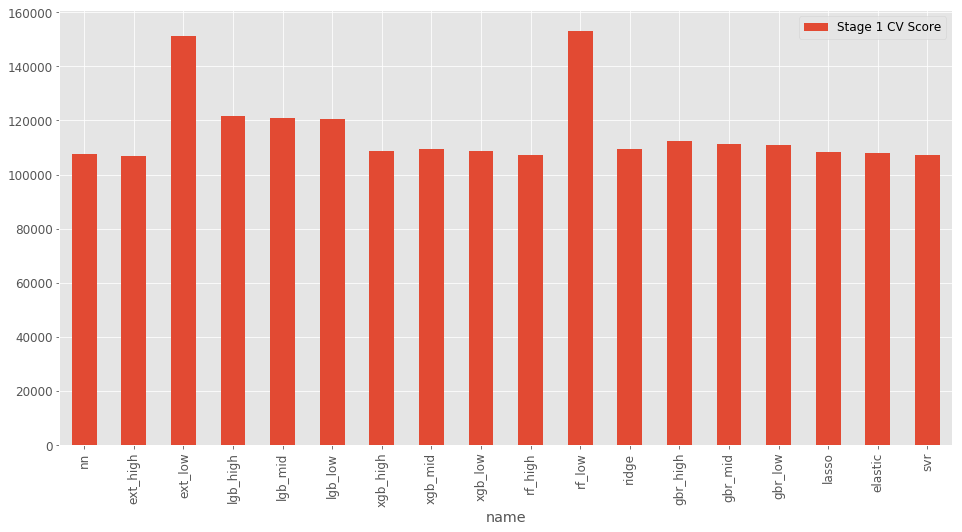

In [54]:
cv_score_stage1_df.set_index('name').plot.bar(figsize=(16,8));

In [21]:
X_train_stage2.to_csv('../input/x_train_stage2.csv', index=False)
X_test_stage2.to_csv('../input/x_test_stage2.csv', index=False)
cv_score_stage1_df.to_csv('../input/cv_score_stage1.csv', index=False)

In [6]:
X_train_stage2 = pd.read_csv('../input/x_train_stage2.csv')
X_test_stage2 = pd.read_csv('../input/x_test_stage2.csv')
cv_score_stage1_df = pd.read_csv('../input/cv_score_stage1.csv')

In [12]:
ridge_l3_param = {
    'alpha': 1e-10,
    'normalize': True,
    'max_iter': 1e7,
    'random_state': RANDOM_SEED
}

ridge_l3_model = SklearnWrapper(Ridge, params=ridge_l3_param, use_avg_oof=True)

ridge_l3_train, ridge_l3_test, ridge_l3_cv_score = get_oof(ridge_l3_model, X_train_stage2, y_train, X_test_stage2,
                                                           rmse_exp, NFOLDS=5, kfold_random_state=RANDOM_SEED)


StartTime:  2019-04-23 19:56:06.420734
Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=10000000.0,
   normalize=True, random_state=0, solver='auto', tol=0.001)

StartTime:  2019-04-23 19:56:06.425268
EndTime:  2019-04-23 19:56:06.430166
TotalTime:  0.00488591194152832
Fold 1 /  CV-Score: 120940.071566

StartTime:  2019-04-23 19:56:06.436115
EndTime:  2019-04-23 19:56:06.441733
TotalTime:  0.00562286376953125
Fold 2 /  CV-Score: 96838.714535

StartTime:  2019-04-23 19:56:06.447286
EndTime:  2019-04-23 19:56:06.452720
TotalTime:  0.00544285774230957
Fold 3 /  CV-Score: 103393.802161

StartTime:  2019-04-23 19:56:06.458103
EndTime:  2019-04-23 19:56:06.463434
TotalTime:  0.005339145660400391
Fold 4 /  CV-Score: 97722.628617

StartTime:  2019-04-23 19:56:06.468801
EndTime:  2019-04-23 19:56:06.474053
TotalTime:  0.005259037017822266
Fold 5 /  CV-Score: 116609.629396
Average CV-Score:  107100.96925495417
EndTime:  2019-04-23 19:56:06.576345
TotalTime:  0.15537023544311523


In [8]:
lasso_l3_param = {'alpha':1e-7, 'normalize':True, 'max_iter':1e7, 'random_state':RANDOM_SEED}

lasso_l3_model = SklearnWrapper(Lasso, params=lasso_l3_param, use_avg_oof=True)
lasso_l3_train, lasso_l3_test, lasso_l3_cv_score = get_oof(lasso_l3_model, X_train_stage2, y_train, X_test_stage2,
                                                  rmse_exp, NFOLDS=5, kfold_random_state=RANDOM_SEED)


StartTime:  2019-04-23 15:15:21.610519
Lasso(alpha=1e-07, copy_X=True, fit_intercept=True, max_iter=10000000.0,
   normalize=True, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

StartTime:  2019-04-23 15:15:21.614741
EndTime:  2019-04-23 15:15:35.345591
TotalTime:  13.730825901031494
Fold 1 /  CV-Score: 120968.608471

StartTime:  2019-04-23 15:15:35.351357
EndTime:  2019-04-23 15:15:46.140117
TotalTime:  10.788752555847168
Fold 2 /  CV-Score: 96449.087140

StartTime:  2019-04-23 15:15:46.145763
EndTime:  2019-04-23 15:16:07.090497
TotalTime:  20.944761037826538
Fold 3 /  CV-Score: 103058.841445

StartTime:  2019-04-23 15:16:07.096796
EndTime:  2019-04-23 15:16:17.547642
TotalTime:  10.450828075408936
Fold 4 /  CV-Score: 97910.369759

StartTime:  2019-04-23 15:16:17.553151
EndTime:  2019-04-23 15:16:29.878511
TotalTime:  12.325342416763306
Fold 5 /  CV-Score: 116884.437138
Average CV-Score:  107054.26879046512
EndTime:  2019-04-2

In [9]:
elastic_l3_param = {'alpha':1e-8, 'normalize':True, 'max_iter':1e6, 'random_state':RANDOM_SEED, 'l1_ratio':0.8}

elastic_l3_model = SklearnWrapper(ElasticNet, params=elastic_l3_param, use_avg_oof=True)
elastic_l3_train, elastic_l3_test, elastic_l3_cv_score = get_oof(elastic_l3_model, X_train_stage2, y_train, X_test_stage2,
                                                      rmse_exp, NFOLDS=5, kfold_random_state=RANDOM_SEED)


StartTime:  2019-04-23 15:16:30.005821
ElasticNet(alpha=1e-08, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000000.0, normalize=True, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

StartTime:  2019-04-23 15:16:30.009202
EndTime:  2019-04-23 15:16:57.139110
TotalTime:  27.129908800125122
Fold 1 /  CV-Score: 120769.108538

StartTime:  2019-04-23 15:16:57.144829
EndTime:  2019-04-23 15:17:23.162789
TotalTime:  26.0179443359375
Fold 2 /  CV-Score: 96648.582794

StartTime:  2019-04-23 15:17:23.168229
EndTime:  2019-04-23 15:18:00.305312
TotalTime:  37.13707613945007
Fold 3 /  CV-Score: 103461.142459

StartTime:  2019-04-23 15:18:00.310925
EndTime:  2019-04-23 15:18:23.362934
TotalTime:  23.051995515823364
Fold 4 /  CV-Score: 97822.969046

StartTime:  2019-04-23 15:18:23.368436
EndTime:  2019-04-23 15:18:49.669357
TotalTime:  26.30095148086548
Fold 5 /  CV-Score: 116546.732877
Average CV-Score:  107049.70714290006

In [10]:
svr_l3_param = {'C':1e3, 'epsilon':0.001, 'gamma':1e-4}

svr_l3_model = SklearnWrapper(SVR, params=svr_l3_param, use_avg_oof=True)
svr_l3_train, svr_l3_test, svr_l3_cv_score = get_oof(svr_l3_model, X_train_stage2, y_train, X_test_stage2,
                                                     rmse_exp, NFOLDS=5, kfold_random_state=RANDOM_SEED)


StartTime:  2019-04-23 15:18:49.796346
SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001,
  gamma=0.0001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)

StartTime:  2019-04-23 15:18:49.799817
EndTime:  2019-04-23 15:18:59.942482
TotalTime:  10.142709016799927
Fold 1 /  CV-Score: 120286.799666

StartTime:  2019-04-23 15:19:04.319054
EndTime:  2019-04-23 15:19:14.754121
TotalTime:  10.435365438461304
Fold 2 /  CV-Score: 96392.447242

StartTime:  2019-04-23 15:19:19.122457
EndTime:  2019-04-23 15:19:29.354267
TotalTime:  10.232123613357544
Fold 3 /  CV-Score: 103502.013016

StartTime:  2019-04-23 15:19:33.743398
EndTime:  2019-04-23 15:19:44.231903
TotalTime:  10.488567590713501
Fold 4 /  CV-Score: 98149.270684

StartTime:  2019-04-23 15:19:48.627639
EndTime:  2019-04-23 15:19:58.941929
TotalTime:  10.314349889755249
Fold 5 /  CV-Score: 114362.011800
Average CV-Score:  106538.50848153098
EndTime:  2019-04-23 15:20:03.391793
TotalTime:  73.595382928

In [30]:
cv_score_stage2_df = pd.DataFrame({
    'name': ['ridge','lasso','elastic','svr'],
    'Stage 2 CV Score':[ridge_l3_cv_score,lasso_l3_cv_score,elastic_l3_cv_score,svr_l3_cv_score]
})
cv_score_stage2_df.to_csv('../input/cv_score_stage2.csv', index=False)

cv_score_stage2_df

,name,Stage 2 CV Score
0,ridge,107100.969255
1,lasso,107054.268790
2,elastic,107049.707143
3,svr,106538.508482


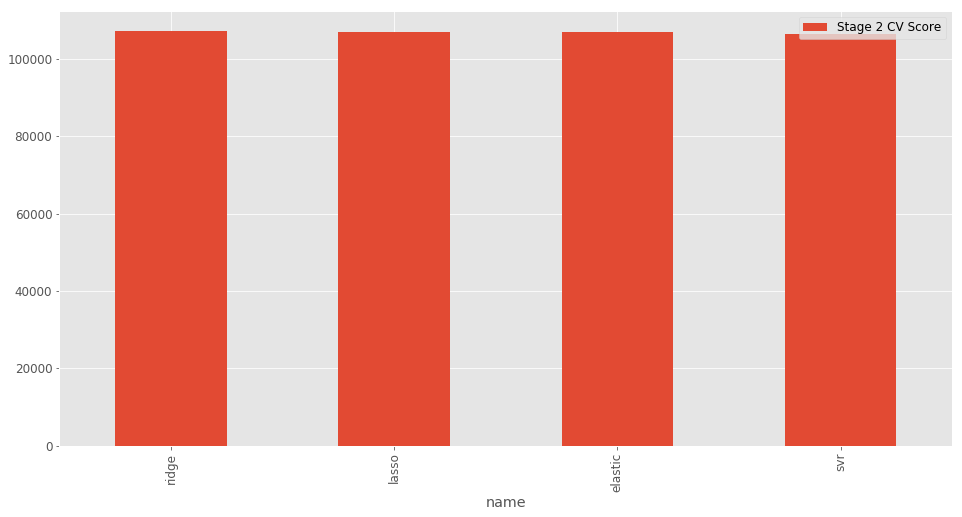

In [55]:
cv_score_stage2_df.set_index('name').plot.bar(figsize=(16,8));

In [11]:
avg_pred = elastic_l3_test

In [56]:
# public leaderboard score: 98316.65734

test = pd.read_csv('../input/test.csv')

output = f'stacking_{datetime.now().strftime("%Y%m%d%H%M%S")}.csv'
print(output)

submission = pd.DataFrame({'id': test['id'], 'price': np.expm1(avg_pred.ravel())})
submission.to_csv(output, index = False)

stacking_20190421093422.csv
